In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dropout
import tensorflow as tf
import joblib
from tensorflow.keras import optimizers

physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Using TensorFlow backend.


In [2]:
sample=pd.read_csv("sample_coords.csv")
sample=sample[["focusing",'nose_x','nose_y','neck_x','neck_y','rShoulder_x','rShoulder_y',
'rElbow_x','rElbow_y','rWrist_x','rWrist_y','lShoulder_x','lShoulder_y','lElbow_x','lElbow_y',
'lWrist_x','lWrist_y','rEye_x','rEye_y','lEye_x','lEye_y','rEar_x','rEar_y','lEar_x','lEar_y','lHand_x','lHand_y']]
print(sample.shape)

Y=sample["focusing"]
X=sample[['nose_x','nose_y','neck_x','neck_y','rShoulder_x','rShoulder_y',
'rElbow_x','rElbow_y','rWrist_x','rWrist_y','lShoulder_x','lShoulder_y','lElbow_x','lElbow_y',
'lWrist_x','lWrist_y','rEye_x','rEye_y','lEye_x','lEye_y','rEar_x','rEar_y','lEar_x','lEar_y','lHand_x','lHand_y']]
sample=preprocessing.scale(X)
print(Y.shape)

(608, 27)
(608,)


In [3]:
dy=pd.DataFrame(Y)
yon=pd.get_dummies(dy.focusing)
print(yon)
dx=pd.DataFrame(X)


     0  1  2
0    1  0  0
1    1  0  0
2    1  0  0
3    1  0  0
4    1  0  0
..  .. .. ..
603  0  0  1
604  0  0  1
605  0  0  1
606  0  0  1
607  0  0  1

[608 rows x 3 columns]


In [4]:
seed = 7
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(dx, yon, test_size=0.2, random_state=seed)
print(X_train)

        nose_x     nose_y     neck_x     neck_y  rShoulder_x  rShoulder_y  \
320  1409.6133  1621.3572  1170.5143  1762.3704    606.41050    1818.8921   
82   1353.2928  1748.5984  1480.6259  1917.4153    973.32574    1903.1691   
272  1325.5178  1409.5591  1494.5048  1832.6090   1015.28400    1846.9706   
23   1634.8258  1847.1273  1536.8201  2016.0066   1029.24260    2044.1661   
557  1537.2922  1734.1205  1621.2580  1537.0846   1156.33640    1438.5094   
..         ...        ...        ...        ...          ...          ...   
579     0.0000     0.0000  1170.3014  2030.1075    747.78296    2058.3718   
502     0.0000     0.0000  1480.4600  1297.4058    860.16050    1339.3580   
537     0.0000     0.0000  1536.5876  1804.6982    930.67020    1706.0259   
196  1861.6865  1395.4132  1607.1399  1508.8930   1057.56160    1508.4382   
175  1395.8949  1509.2429  1184.2370  1607.2845    635.19670    1606.8861   

       rElbow_x   rElbow_y    rWrist_x   rWrist_y  ...     rEye_x     rEye_

In [5]:
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [6]:
def distract_model():
    model=Sequential()
    model.add(Dense(64,input_dim=26,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(3,activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model
model=distract_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1728      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 3,907
Trainable params: 3,907
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=100,batch_size=30)

# summarize history for accuracy

Train on 486 samples, validate on 122 samples
Epoch 1/100
486/486 [==============================] - 0s 1ms/step - loss: 358.3437 - accuracy: 0.4218 - val_loss: 120.7659 - val_accuracy: 0.6393
Epoch 2/100
486/486 [==============================] - 0s 137us/step - loss: 176.6439 - accuracy: 0.4835 - val_loss: 111.7030 - val_accuracy: 0.3770
Epoch 3/100
486/486 [==============================] - 0s 152us/step - loss: 142.2720 - accuracy: 0.4979 - val_loss: 49.6481 - val_accuracy: 0.5902
Epoch 4/100
486/486 [==============================] - 0s 179us/step - loss: 108.3359 - accuracy: 0.5226 - val_loss: 35.5834 - val_accuracy: 0.6311
Epoch 5/100
486/486 [==============================] - 0s 189us/step - loss: 95.0013 - accuracy: 0.5432 - val_loss: 30.2651 - val_accuracy: 0.5328
Epoch 6/100
486/486 [==============================] - 0s 148us/step - loss: 73.2373 - accuracy: 0.5350 - val_loss: 26.4120 - val_accuracy: 0.5164
Epoch 7/100
486/486 [==============================] - 0s 125us/step

486/486 [==============================] - 0s 123us/step - loss: 1.3258 - accuracy: 0.8621 - val_loss: 0.1476 - val_accuracy: 0.9590
Epoch 57/100
486/486 [==============================] - 0s 121us/step - loss: 1.4926 - accuracy: 0.8971 - val_loss: 0.1704 - val_accuracy: 0.9426
Epoch 58/100
486/486 [==============================] - 0s 125us/step - loss: 0.9250 - accuracy: 0.8971 - val_loss: 0.1857 - val_accuracy: 0.9508
Epoch 59/100
486/486 [==============================] - 0s 156us/step - loss: 1.0967 - accuracy: 0.8786 - val_loss: 0.1764 - val_accuracy: 0.9508
Epoch 60/100
486/486 [==============================] - 0s 160us/step - loss: 1.1352 - accuracy: 0.8848 - val_loss: 0.5654 - val_accuracy: 0.8689
Epoch 61/100
486/486 [==============================] - 0s 152us/step - loss: 1.0115 - accuracy: 0.8786 - val_loss: 0.3812 - val_accuracy: 0.9262
Epoch 62/100
486/486 [==============================] - 0s 155us/step - loss: 0.9782 - accuracy: 0.8868 - val_loss: 0.5279 - val_accuracy

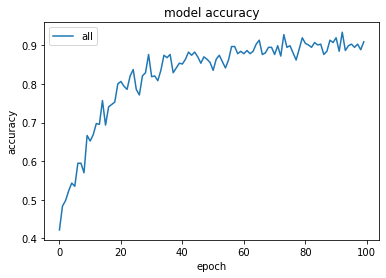

In [8]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['all'], loc='upper left')
plt.show()

In [9]:
score=model.evaluate(X_test,y_test)
print(score[1])
joblib.dump(model,'detecter3.pkl')

122/122 [==============================] - 0s 98us/step
0.8442623019218445


['detecter3.pkl']

In [10]:
type(X_train)
X_train.shape


(486, 26)

In [11]:
ll=joblib.load("detecter3.pkl")

In [12]:
print(ll.predict(X_train))
max_a = np.argmax(ll.predict(X_train), axis=1)
print(max_a)

[[1.1351771e-03 9.9886489e-01 4.7979265e-32]
 [1.0000000e+00 1.3400318e-09 1.2796702e-20]
 [7.6441616e-02 9.2355841e-01 1.2427448e-09]
 ...
 [0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.0000000e+00 4.8044685e-10 0.0000000e+00]
 [1.0000000e+00 1.8928725e-08 9.4480377e-31]]
[1 0 1 0 2 2 1 2 0 2 0 1 0 1 1 0 0 2 1 1 0 1 0 0 1 0 2 1 1 0 2 1 1 0 1 1 1
 1 0 1 0 1 0 1 2 0 0 1 0 0 2 1 1 0 2 2 0 1 1 0 1 0 1 0 0 1 2 1 0 0 2 1 0 0
 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 2 0 2 0 2 2 0 2 0 1 1 0 1 2 0 0 0 2
 0 0 2 0 1 1 1 1 1 0 2 0 0 0 0 0 0 0 0 0 2 1 0 2 0 0 1 0 1 0 1 1 2 2 0 0 2
 0 0 0 1 0 1 0 2 1 0 0 2 0 0 1 2 2 0 0 1 1 1 1 0 0 2 1 0 1 0 0 2 0 1 1 2 1
 0 0 2 0 0 2 2 1 0 2 0 1 1 0 1 0 2 0 0 0 1 0 0 0 1 1 0 0 0 1 2 0 1 1 1 0 0
 2 1 1 0 1 0 0 0 0 0 2 1 1 0 1 0 1 0 1 0 1 1 2 1 1 2 1 0 0 1 2 2 0 2 1 2 0
 0 2 0 0 2 2 2 0 0 0 0 1 0 1 0 0 2 0 1 1 0 2 0 1 0 0 0 0 0 2 1 1 1 2 2 0 0
 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 2 0 1 1 0 2 1 0 1 2 2 0 1 0 0 2 0 1 0 2
 1 2 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 2 0 1 2 2 1 

In [13]:
sample2=pd.read_csv("sample_coords2.csv")
print(sample2.shape)
print(sample2)
print(ll.predict(sample2))

(21, 26)
       nose_x     nose_y     neck_x     neck_y  rShoulder_x  rShoulder_y  \
0   314.62590  262.94263  318.86023  389.95255    181.20462    402.77814   
1   353.41934  179.03337  316.77927  290.96880    179.05066    299.56450   
2   336.14035   92.89957  318.88623  219.96025    161.89920    228.51115   
3   327.53696  108.06870  321.14438  202.78676    192.01016    211.28368   
4   325.40808   88.69081  325.41522  213.47406    194.11711    215.74954   
5   321.06076  164.02551  318.84628  215.64767    181.22145    228.50278   
6   333.90990  170.45502  323.24680  213.45380    183.42201    215.65201   
7   336.20358  189.82861  325.37140  211.34216    185.53722    211.31184   
8   338.30630  183.38904  325.38570  211.29999    185.54785    211.31776   
9   306.07422  114.53634  323.24133  196.31306    179.05510    196.21533   
10  329.63202  127.42144  361.95100  198.42096    217.86809    200.65703   
11  333.92426  129.59622  364.06412  198.41320    219.94348    202.72720   
12 

In [14]:
type(sample2)

pandas.core.frame.DataFrame